In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing data
nyc=pd.read_csv('nyc_taxi_trip_duration.csv')

In [5]:
#1st 5 instances
nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
nyc.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [7]:
#shape of the data
nyc.shape

(729322, 11)

In [8]:
nyc.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
nyc.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
#Identifying variable with integer datatype
nyc.dtypes[nyc.dtypes=='int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [11]:
#converting trip duration from seconds to hours
nyc['trip_duration']=nyc['trip_duration']/3600

 - **vendor_id** : Ordinal data, hence needs to be conveted into categorical data
 

In [12]:
#converting integer data to categorical data type
nyc['vendor_id']=nyc['vendor_id'].astype('category')
nyc.dtypes[nyc.dtypes=='int64']

passenger_count    int64
dtype: object

In [13]:
#identifying float variables
nyc.dtypes[nyc.dtypes=='float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
dtype: object

In [14]:
#identifying object data type variables
nyc.dtypes[nyc.dtypes=='object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [15]:
#manually checking object data type  variable
nyc[['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']]

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,N
...,...,...,...,...
729317,id3905982,2016-05-21 13:29:38,2016-05-21 13:34:34,N
729318,id0102861,2016-02-22 00:43:11,2016-02-22 00:48:26,N
729319,id0439699,2016-04-15 18:56:48,2016-04-15 19:08:01,N
729320,id2078912,2016-06-19 09:50:47,2016-06-19 09:58:14,N


In [16]:
#converting store_and_fwd_flag to categorical data type
nyc['store_and_fwd_flag']=nyc['store_and_fwd_flag'].astype('category')

In [17]:
nyc.dtypes[nyc.dtypes=='object']

id                  object
pickup_datetime     object
dropoff_datetime    object
dtype: object

 -  out of Dropoff and pickup date, we need month
 -  out of Dropoff and pickup time we need hour of the day

In [18]:
#converting pickup_datetime datatype to datetime
nyc['pickup_datetime']=pd.to_datetime(nyc['pickup_datetime'])
nyc.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
dtype: object

In [19]:
#changing other datetime data types
nyc['dropoff_datetime']=pd.to_datetime(nyc['dropoff_datetime'])
nyc.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
dtype: object

In [20]:
#extracting pickup month and day
nyc['pickup_doy']=nyc['pickup_datetime'].dt.dayofyear
nyc['pickup_woy']=nyc['pickup_datetime'].dt.weekofyear
nyc['pickup_moy']=nyc['pickup_datetime'].dt.month
#nyc['pickup_month']=nyc['pickup_month'].astype('category')
nyc['pickup_dow']=nyc['pickup_datetime'].dt.dayofweek
#nyc['pickup_day']=nyc['pickup_day'].astype('category')

nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_doy,pickup_woy,pickup_moy,pickup_dow
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,0.111111,60,9,2,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,0.305556,71,10,3,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,0.454167,52,7,2,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,0.316944,5,1,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,0.235556,48,7,2,2


In [21]:
#extracting dropoff month and day
nyc['dropoff_doy']=nyc['dropoff_datetime'].dt.dayofyear
nyc['dropoff_woy']=nyc['dropoff_datetime'].dt.weekofyear
nyc['dropoff_moy']=nyc['dropoff_datetime'].dt.month
nyc['dropoff_dow']=nyc['dropoff_datetime'].dt.dayofweek
#nyc['dropoff_month']=nyc['dropoff_month'].astype('category')
#nyc['dropoff_day']=nyc['dropoff_datetime'].dt.day
#nyc['dropoff_day']=nyc['dropoff_day'].astype('category')
nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_doy,pickup_woy,pickup_moy,pickup_dow,dropoff_doy,dropoff_woy,dropoff_moy,dropoff_dow
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,0.111111,60,9,2,0,60,9,2,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,0.305556,71,10,3,4,71,10,3,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,0.454167,52,7,2,6,52,7,2,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,0.316944,5,1,1,1,5,1,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,0.235556,48,7,2,2,48,7,2,2


In [22]:
#Adding hour of the day
nyc['pickup_hod']=nyc['pickup_datetime'].dt.hour
nyc['dropoff_hod']=nyc['dropoff_datetime'].dt.hour

In [23]:
nyc.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_doy', 'pickup_woy', 'pickup_moy', 'pickup_dow',
       'dropoff_doy', 'dropoff_woy', 'dropoff_moy', 'dropoff_dow',
       'pickup_hod', 'dropoff_hod'],
      dtype='object')

In [24]:
nyc[['id','pickup_doy','pickup_woy','pickup_moy','pickup_dow','dropoff_doy','dropoff_woy','dropoff_moy','dropoff_dow']].head()

,id,pickup_doy,pickup_woy,pickup_moy,pickup_dow,dropoff_doy,dropoff_woy,dropoff_moy,dropoff_dow
0,id1080784,60,9,2,0,60,9,2,0
1,id0889885,71,10,3,4,71,10,3,4
2,id0857912,52,7,2,6,52,7,2,6
3,id3744273,5,1,1,1,5,1,1,1
4,id0232939,48,7,2,2,48,7,2,2


In [25]:
nyc=nyc.drop(columns=['pickup_datetime','dropoff_datetime','dropoff_doy', 'dropoff_woy', 'dropoff_moy', 'dropoff_dow'])

In [26]:
nyc.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_doy,pickup_woy,pickup_moy,pickup_dow,pickup_hod,dropoff_hod
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,0.111111,60,9,2,0,16,16
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,0.305556,71,10,3,4,23,23
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,0.454167,52,7,2,6,17,18
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,0.316944,5,1,1,1,9,10
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,0.235556,48,7,2,2,6,6


## Univariate Analysis

In [27]:
# Numerical datatypes
nyc.select_dtypes(include=['int64','float64','Int64']).dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
pickup_doy             int64
pickup_woy             int64
pickup_moy             int64
pickup_dow             int64
pickup_hod             int64
dropoff_hod            int64
dtype: object

In [28]:
#seggregating variables into groups
pickup_location1=['pickup_longitude','pickup_latitude']
pickup_location2=['pickup_moy','pickup_dow','pickup_hod']
pickup_location3=['pickup_doy','pickup_woy']
dropoff_location=['dropoff_longitude','dropoff_latitude','dropoff_hod']
time_of_trip=['trip_duration']
passenger=['passenger_count']

In [29]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (10*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

# time of trip

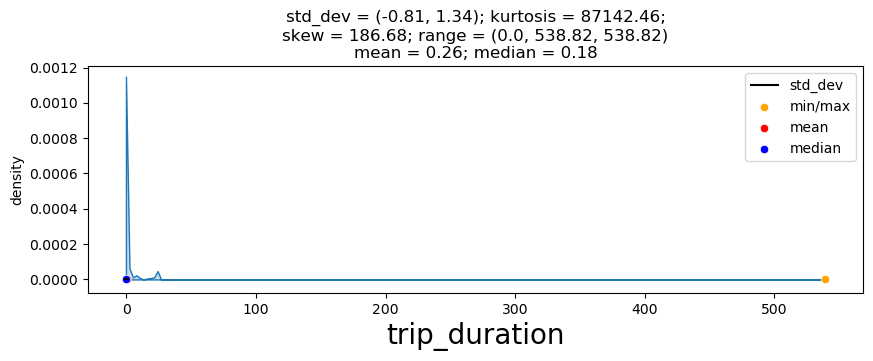

In [30]:
UVA_numeric(nyc,time_of_trip)

# No. of passengers

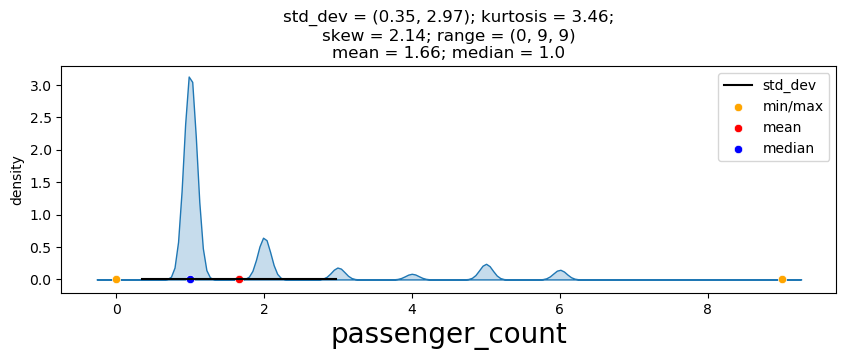

In [31]:
UVA_numeric(nyc,passenger)

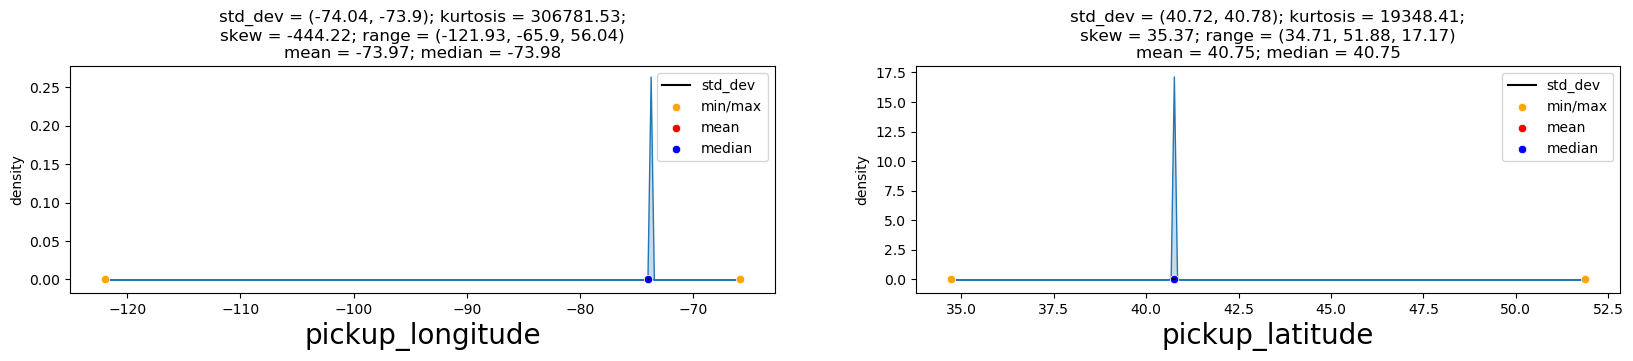

In [32]:
UVA_numeric(nyc,pickup_location1)

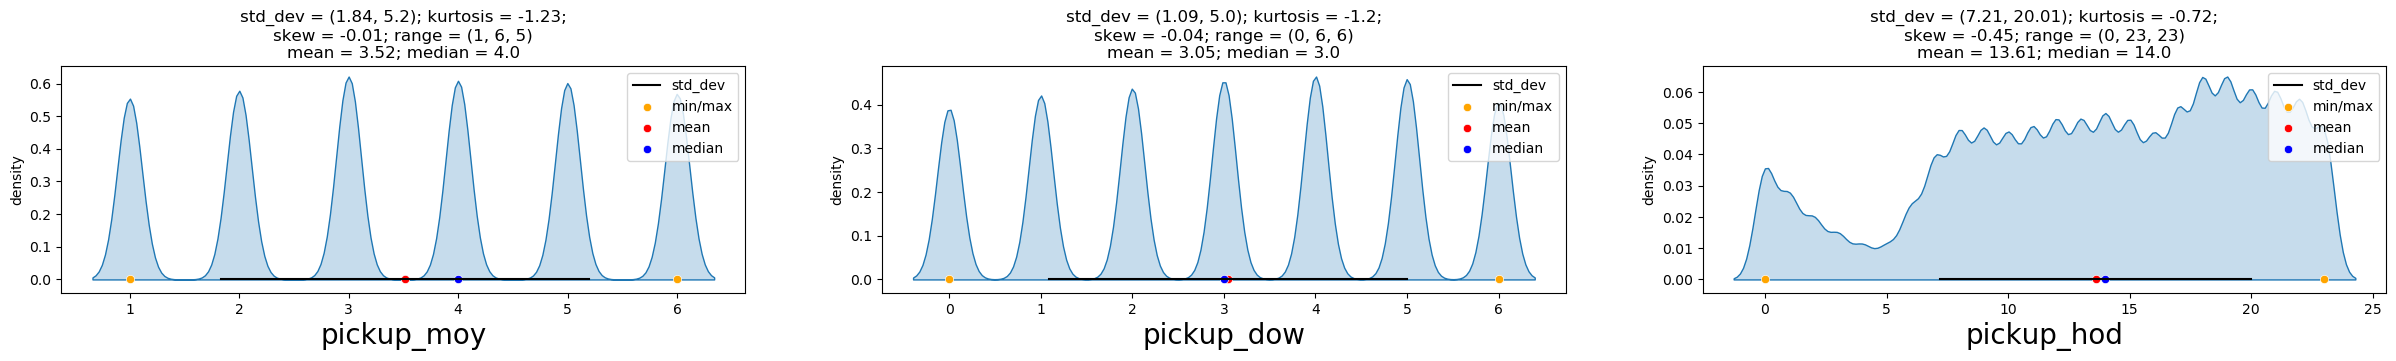

In [33]:
UVA_numeric(nyc,pickup_location2)

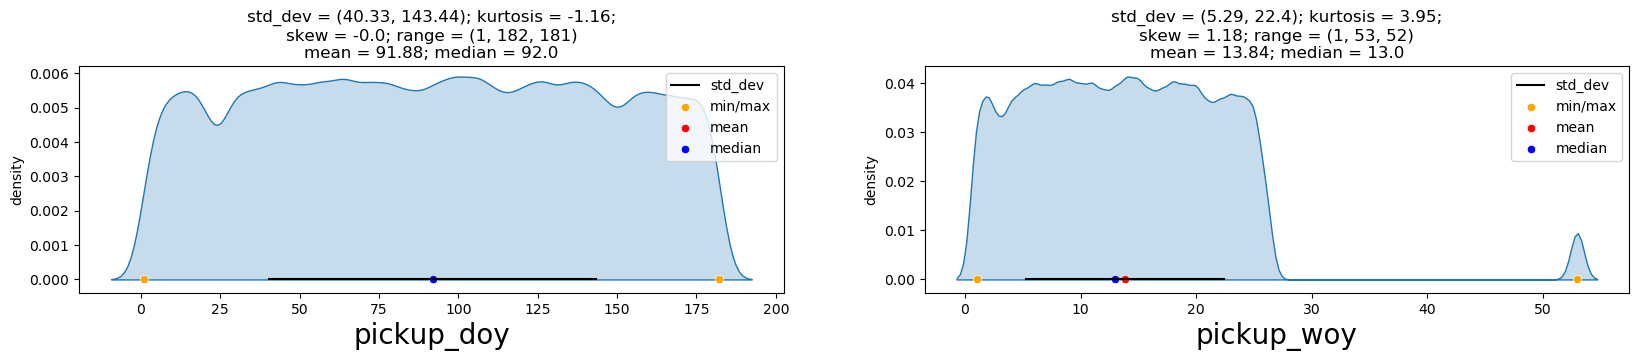

In [34]:
UVA_numeric(nyc,pickup_location3)

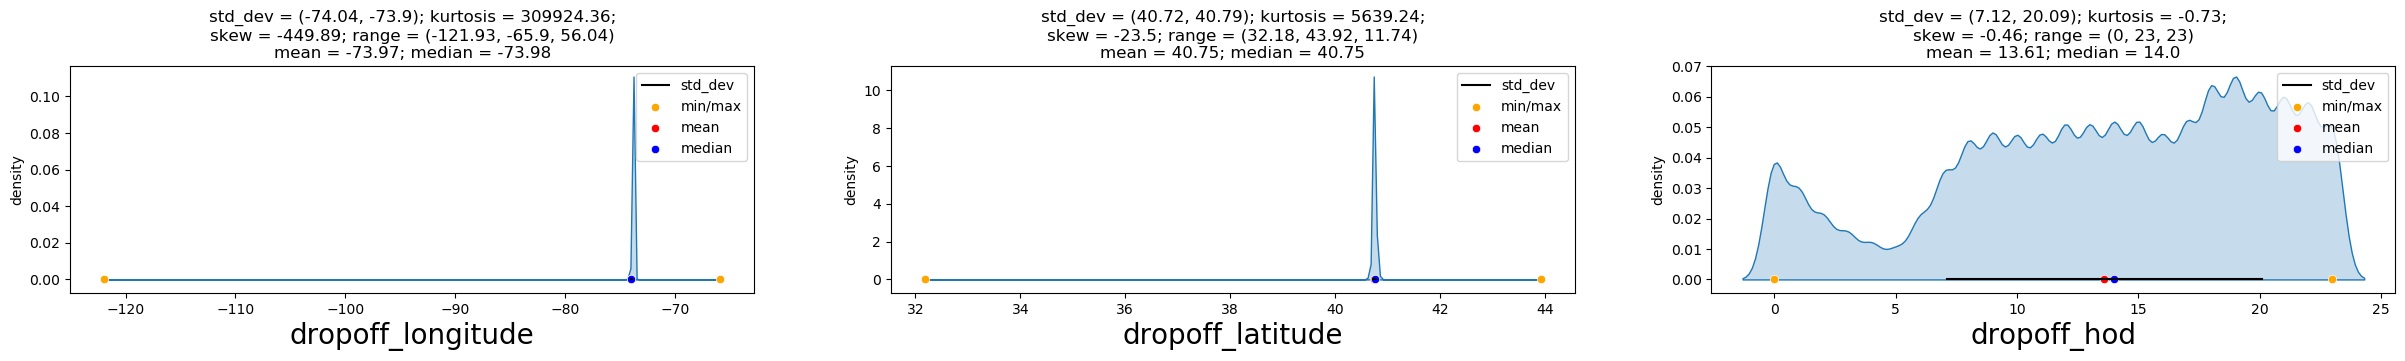

In [35]:
UVA_numeric(nyc,dropoff_location)